# Computing correlations

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time
import datetime

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
plt.style.use('fivethirtyeight')
from tqdm import tqdm

In [57]:
# Loading the dataset
df = pd.read_csv('../Processed_Data/drugs_pct_changes_monthly_since2017.csv')
df.head(10)

,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date,Pct_change,changed
0,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,313.0,1,2017,132,2017_01,NaN,0
1,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,313.0,2,2017,144,2017_02,0.000000,0
2,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,313.0,3,2017,152,2017_03,0.000000,0
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,313.0,4,2017,145,2017_04,0.000000,0
4,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,313.0,5,2017,176,2017_05,0.000000,0
5,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,338.0,6,2017,197,2017_06,0.079872,1
6,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,338.0,7,2017,161,2017_07,0.000000,0
7,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,338.0,8,2017,176,2017_08,0.000000,0
8,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,338.0,9,2017,190,2017_09,0.000000,0
9,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,338.0,10,2017,175,2017_10,0.000000,0


### Trx Correlation

Doing it per Major class

In [58]:
trx = df.groupby(['Major Class', 'Date']).TRx.sum().unstack().transpose().copy()
trx.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2017_01,2519.0,2.0,1316136.0,12238.0,102236.0,27464.0,13024.0,345237.0,1471.0,93237.0,...,6577580.0,455950.0,NaN,5780.0,3900.0,1571766.0,480473.0,1313425.0,33569.0,560.0
2017_02,2292.0,1.0,1220940.0,12077.0,93333.0,24940.0,11817.0,299291.0,1286.0,85157.0,...,5966578.0,409105.0,NaN,5208.0,3721.0,1419965.0,425295.0,710631.0,31035.0,504.0
2017_03,2648.0,1.0,1394112.0,13748.0,106532.0,28970.0,13740.0,330579.0,1474.0,98205.0,...,6800243.0,466228.0,NaN,6010.0,4144.0,1612028.0,486978.0,468337.0,36950.0,543.0
2017_04,2377.0,2.0,1271591.0,12325.0,100087.0,26379.0,12444.0,308564.0,1412.0,89644.0,...,6173965.0,421250.0,NaN,5333.0,3883.0,1489867.0,455213.0,370238.0,36914.0,511.0
2017_05,2698.0,1.0,1329075.0,13902.0,108054.0,28666.0,13132.0,324831.0,1443.0,97128.0,...,6619831.0,453607.0,2.0,5951.0,4354.0,1579776.0,494600.0,431550.0,41776.0,491.0


In [59]:
trx_corr = trx.corr()
trx_corr.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Major Class,,,,,,,,,,,,,,,,,,,,,
A.C.T.H.,1.000000,-0.055689,0.654918,-0.571654,0.822612,0.759874,0.849593,0.819909,0.557889,-0.398862,...,0.441634,0.761438,-0.022107,0.431946,-0.568629,0.753870,0.514886,-0.091356,-0.213886,0.866878
A05A1 CHOLERETICS+CHOLEKINETIC,-0.055689,1.000000,-0.034840,0.311733,0.148465,-0.059766,-0.108458,-0.164123,0.032435,0.243652,...,0.025764,-0.059289,0.054249,-0.093946,0.170912,0.001975,-0.008338,0.011287,-0.036601,-0.074766
ADHD,0.654918,-0.034840,1.000000,-0.506162,0.594314,0.626343,0.681967,0.585629,0.478455,-0.218826,...,0.507757,0.652476,0.099148,0.313730,-0.509759,0.574964,0.434889,0.153003,-0.119730,0.706672
ALL OTHER RESPIRATORY,-0.571654,0.311733,-0.506162,1.000000,-0.378208,-0.778744,-0.763980,-0.742006,-0.552392,0.705433,...,-0.609398,-0.758803,-0.036356,-0.714688,0.878877,-0.656096,-0.594680,0.031469,0.175606,-0.811651
ALL OTHER THERAPEUTICS,0.822612,0.148465,0.594314,-0.378208,1.000000,0.516075,0.758060,0.744566,0.347543,-0.393936,...,0.194148,0.537285,-0.244536,0.054249,-0.531683,0.472414,0.199352,-0.160378,-0.556015,0.707672


In [60]:
# trx_corr = trx_corr.where(np.triu(np.ones(trx_corr.shape)).astype(np.bool))
trx_corr = trx_corr.stack().to_frame().reset_index(level=1).rename(columns={'Major Class': 'column', 0: 'corr'}).reset_index().rename(columns={'Major Class': 'row'})
trx_corr

,row,column,corr
0,A.C.T.H.,A.C.T.H.,1.000000
1,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,-0.055689
2,A.C.T.H.,ADHD,0.654918
3,A.C.T.H.,ALL OTHER RESPIRATORY,-0.571654
4,A.C.T.H.,ALL OTHER THERAPEUTICS,0.822612
...,...,...,...
5616,VITAMINS & MINERALS,THYROID ANTI-THYROID AND IODINE PREPS,0.831062
5617,VITAMINS & MINERALS,URINARY INCONTINENCE,0.665303
5618,VITAMINS & MINERALS,"VACCINES (PURE, COMB, OTHER)",-0.058473
5619,VITAMINS & MINERALS,VIRAL HEPATITIS,-0.277109


In [61]:
trx_corr.to_csv('trx_corr_since2017.csv')

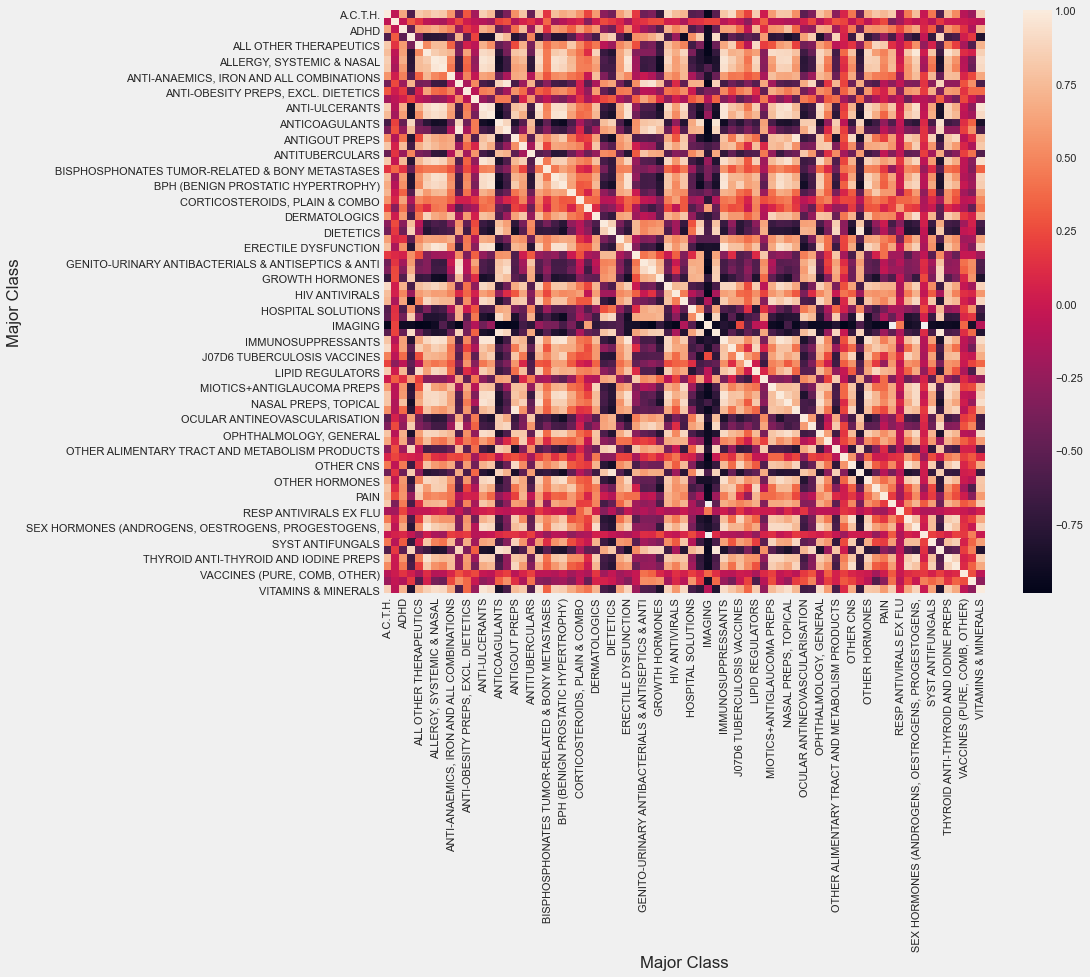

In [62]:
sns.heatmap(trx.corr(), annot=False)
plt.savefig('TRx_correlations_Major_class.jpg', bbox_inches='tight', pad_inches=2)
plt.show()

### Price Changes Correlation

Doing it per Major class

In [66]:
changed = df.groupby(['Major Class', 'Date']).changed.sum().unstack().transpose().copy()
changed.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2017_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017_02,1.0,0.0,32.0,0.0,13.0,0.0,1.0,23.0,1.0,0.0,...,60.0,33.0,NaN,11.0,7.0,8.0,26.0,5.0,10.0,0.0
2017_03,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,NaN,0.0,0.0,0.0,0.0,2.0,1.0,3.0
2017_04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017_05,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,5.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0


In [67]:
changed_corr = changed.corr()
changed_corr.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Major Class,,,,,,,,,,,,,,,,,,,,,
A.C.T.H.,1.000000,NaN,0.612044,0.039793,0.367928,0.260853,0.313384,0.732188,-0.006262,-0.080664,...,0.580112,0.553312,-0.080845,0.641080,0.506423,0.073236,0.464909,0.156368,0.737030,-0.069175
A05A1 CHOLERETICS+CHOLEKINETIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADHD,0.612044,NaN,1.000000,0.384569,0.643187,0.508121,0.540674,0.890746,0.369043,0.318234,...,0.900634,0.885214,0.362599,0.829065,0.850628,0.502556,0.631618,0.503703,0.822710,-0.109473
ALL OTHER RESPIRATORY,0.039793,NaN,0.384569,1.000000,0.227231,0.275597,0.280584,0.239964,0.186568,0.404234,...,0.448416,0.486164,0.317968,0.234712,0.429125,0.456876,0.121248,0.516567,0.114454,-0.100531
ALL OTHER THERAPEUTICS,0.367928,NaN,0.643187,0.227231,1.000000,0.273807,0.540749,0.587805,0.117086,0.286732,...,0.632553,0.609749,0.346440,0.615740,0.741660,0.448747,0.587588,0.334406,0.545229,-0.109779


In [69]:
# trx_corr = trx_corr.where(np.triu(np.ones(trx_corr.shape)).astype(np.bool))
changed_corr = changed_corr.stack().to_frame().reset_index(level=1).rename(columns={'Major Class': 'column', 0: 'corr'}).reset_index().rename(columns={'Major Class': 'row'})
changed_corr

,row,column,corr
0,A.C.T.H.,A.C.T.H.,1.000000
1,A.C.T.H.,ADHD,0.612044
2,A.C.T.H.,ALL OTHER RESPIRATORY,0.039793
3,A.C.T.H.,ALL OTHER THERAPEUTICS,0.367928
4,A.C.T.H.,ALL OTHER UROLOGICAL,0.260853
...,...,...,...
5179,VITAMINS & MINERALS,THYROID ANTI-THYROID AND IODINE PREPS,-0.078510
5180,VITAMINS & MINERALS,URINARY INCONTINENCE,0.035981
5181,VITAMINS & MINERALS,"VACCINES (PURE, COMB, OTHER)",-0.101362
5182,VITAMINS & MINERALS,VIRAL HEPATITIS,0.025415


In [70]:
changed_corr.to_csv('price_chg_corr_since2017.csv')

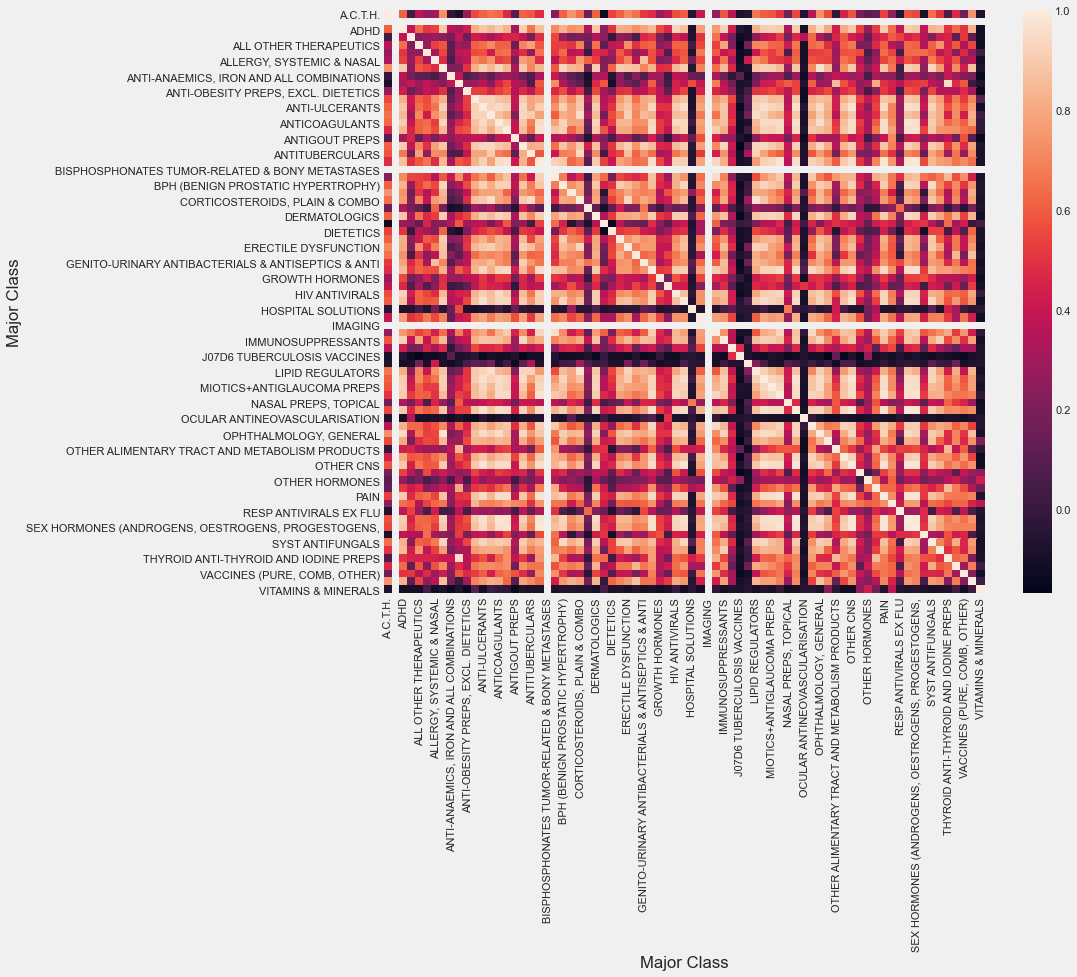

In [38]:
sns.heatmap(changed.corr(), annot=False)
plt.savefig('Price_chanced_correlations_Major_class.jpg', bbox_inches='tight', pad_inches=2)
plt.show()